In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cancer_data = pd.read_csv('Downloads/Cancer_Patients_Data.csv')

In [3]:
cancer_data.head()

,State/District,Cancer Type,Category,Patients,Cancer Stage,Top Medicines,Medicine Brand,Purpose,Specialty Hospitals,Region Concentration,Year
0,Haryana,Lung,Female,1452,Late,Paclitaxel,Generic,Curative,"Apollo Cancer Institute, Chennai",High,2023
1,Kerala,Oral,Female,2492,Intermediate,5-Fluorouracil,Branded,Curative,Netaji Subhas Chandra Bose Cancer Hospital,Medium,2024
2,Punjab,Stomach,Male,208,Early,Oxaliplatin,Generic,Curative,"PGIMER, Chandigarh",High,2024
3,Delhi,Colorectal,Female,935,Intermediate,Trastuzumab,Branded,Curative,"PGIMER, Chandigarh",High,2024
4,Gujarat,Prostate,Mixed,1993,Early,Capecitabine,Generic,Curative,Netaji Subhas Chandra Bose Cancer Hospital,High,2024


# Total Patients by Cancer Type with Proportions

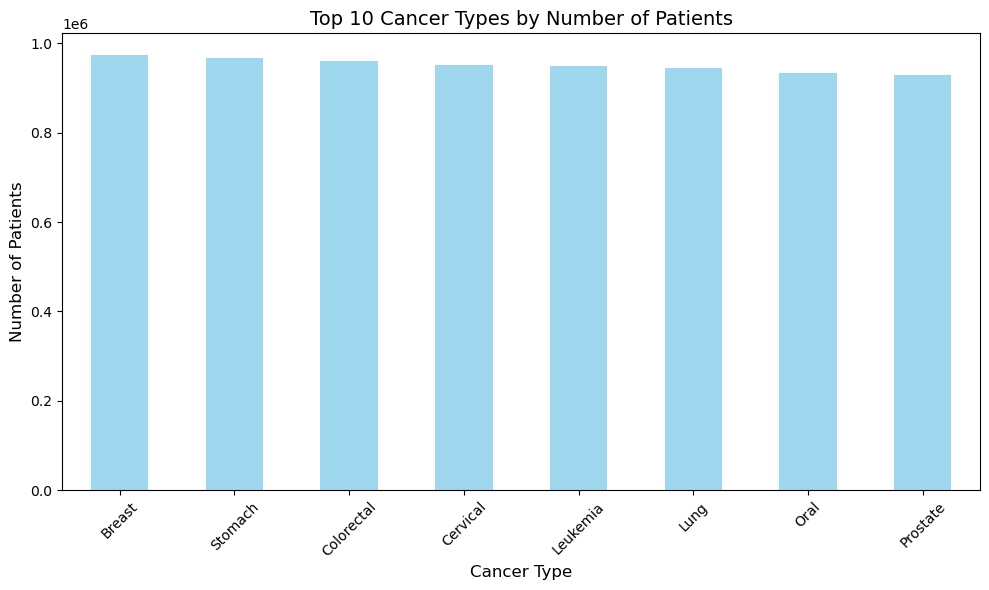

Cancer Type Proportions (%):
Cancer Type
Breast        12.792413
Stomach       12.696476
Colorectal    12.632058
Cervical      12.508359
Leukemia      12.466054
Lung          12.423459
Oral          12.273312
Prostate      12.207870
Name: Patients, dtype: float64


In [4]:
cancer_type_summary = cancer_data.groupby('Cancer Type')['Patients'].sum().sort_values(ascending=False)

# Calculate proportions
cancer_type_summary_pct = (cancer_type_summary / cancer_type_summary.sum()) * 100

# Plot the top 10 cancer types
plt.figure(figsize=(10, 6))
cancer_type_summary.head(10).plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Top 10 Cancer Types by Number of Patients', fontsize=14)
plt.xlabel('Cancer Type', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# Display proportions
print("Cancer Type Proportions (%):")
print(cancer_type_summary_pct.head(10))


# Patient Distribution by State/District with Insights

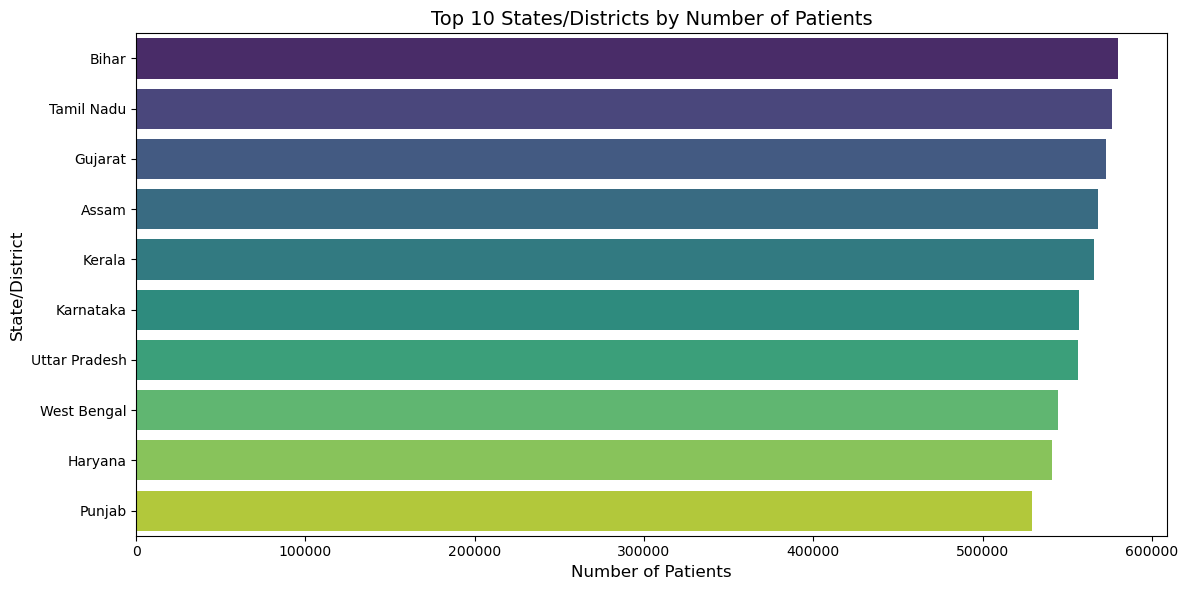

In [5]:
state_summary = cancer_data.groupby('State/District')['Patients'].sum().sort_values(ascending=False)

# Plot the top 10 states/districts
plt.figure(figsize=(12, 6))
sns.barplot(x=state_summary.head(10).values, y=state_summary.head(10).index, palette='viridis')
plt.title('Top 10 States/Districts by Number of Patients', fontsize=14)
plt.xlabel('Number of Patients', fontsize=12)
plt.ylabel('State/District', fontsize=12)
plt.tight_layout()
plt.show()

# High-Concentration Areas Analysis

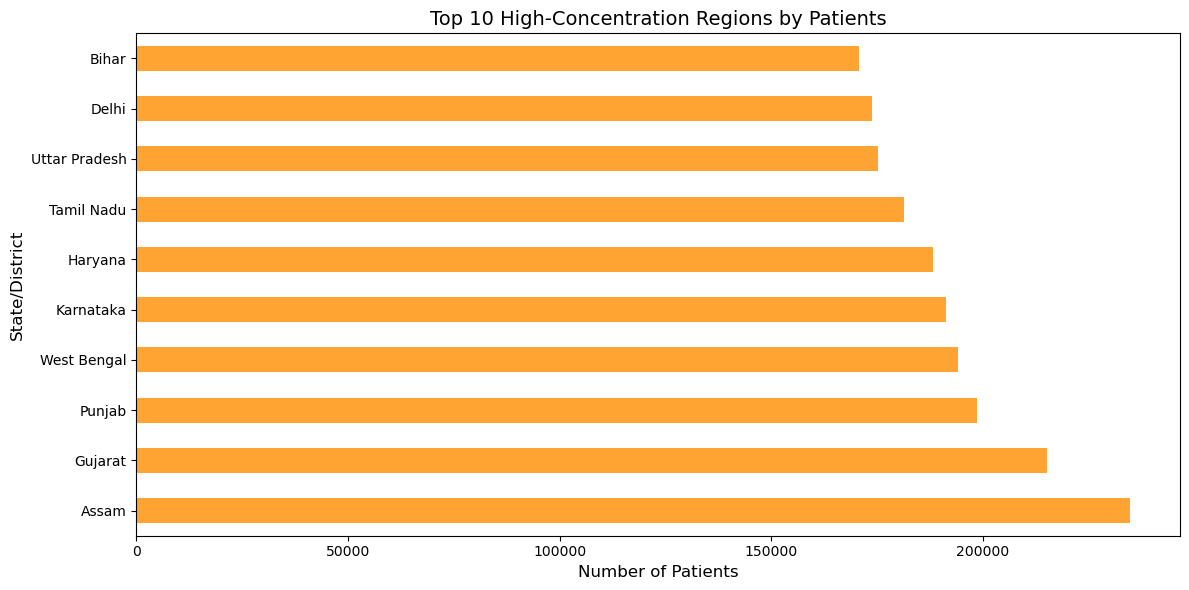

Percentage of Patients in High-Concentration Regions: 33.59%


In [6]:
highest_concentration = cancer_data[cancer_data['Region Concentration'] == 'High'] \
    .groupby('State/District')['Patients'].sum().sort_values(ascending=False)

# Percentage contribution from high-concentration regions
high_concentration_pct = (highest_concentration.sum() / cancer_data['Patients'].sum()) * 100

# Plot high-concentration areas
plt.figure(figsize=(12, 6))
highest_concentration.head(10).plot(kind='barh', color='darkorange', alpha=0.8)
plt.title('Top 10 High-Concentration Regions by Patients', fontsize=14)
plt.xlabel('Number of Patients', fontsize=12)
plt.ylabel('State/District', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Percentage of Patients in High-Concentration Regions: {high_concentration_pct:.2f}%")


# Top 20 Medicines by Usage

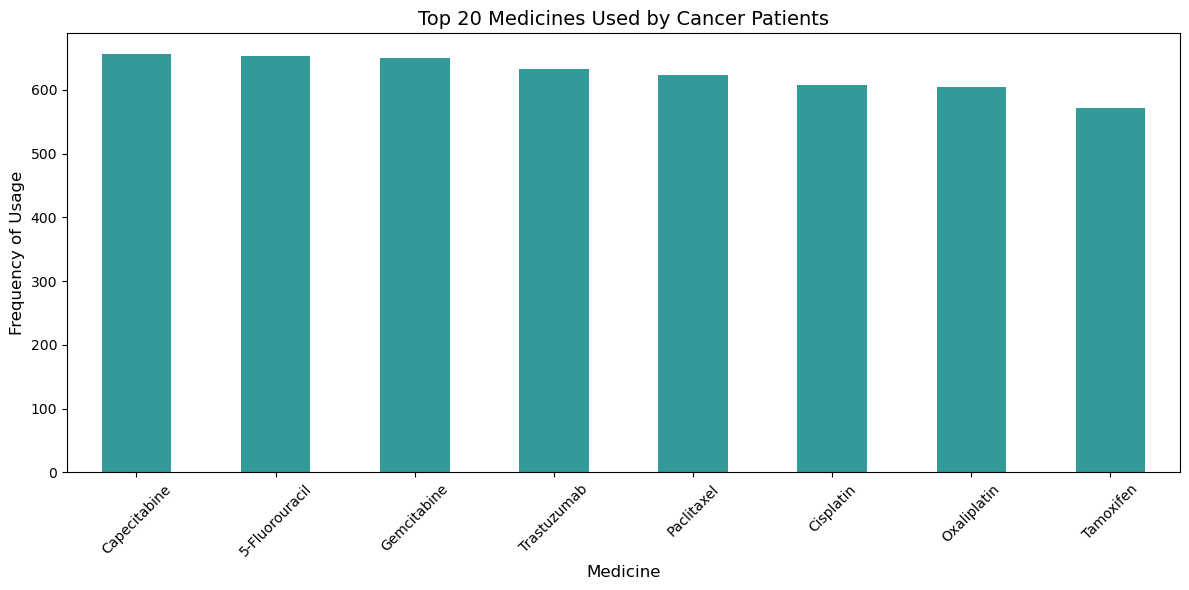

Top 20 Medicines by Frequency of Usage:
Top Medicines
Capecitabine      656
5-Fluorouracil    654
Gemcitabine       650
Trastuzumab       633
Paclitaxel        624
Cisplatin         607
Oxaliplatin       605
Tamoxifen         571
Name: count, dtype: int64


In [7]:
# Summarize the frequency of medicines
top_medicines = cancer_data['Top Medicines'].value_counts().head(20)

# Plot the top 20 medicines
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_medicines.plot(kind='bar', color='teal', alpha=0.8)
plt.title('Top 20 Medicines Used by Cancer Patients', fontsize=14)
plt.xlabel('Medicine', fontsize=12)
plt.ylabel('Frequency of Usage', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

print("Top 20 Medicines by Frequency of Usage:")
print(top_medicines)


# Medicine Usage by Cancer Stage

In [8]:
# Group medicines by cancer stage
medicine_stage_analysis = cancer_data.groupby(['Top Medicines', 'Cancer Stage'])['Patients'].sum().unstack()

# Filter for top medicines
top_medicine_analysis = medicine_stage_analysis.loc[top_medicines.index]

print("Medicine Usage Across Cancer Stages:")
print(top_medicine_analysis)


Medicine Usage Across Cancer Stages:
Cancer Stage     Early  Intermediate    Late
Top Medicines                               
Capecitabine    354633        330058  315199
5-Fluorouracil  339099        302768  319093
Gemcitabine     357708        337990  318991
Trastuzumab     276479        335076  318722
Paclitaxel      318201        309929  323970
Cisplatin       333296        301672  303750
Oxaliplatin     291153        328860  306051
Tamoxifen       282913        291025  314610


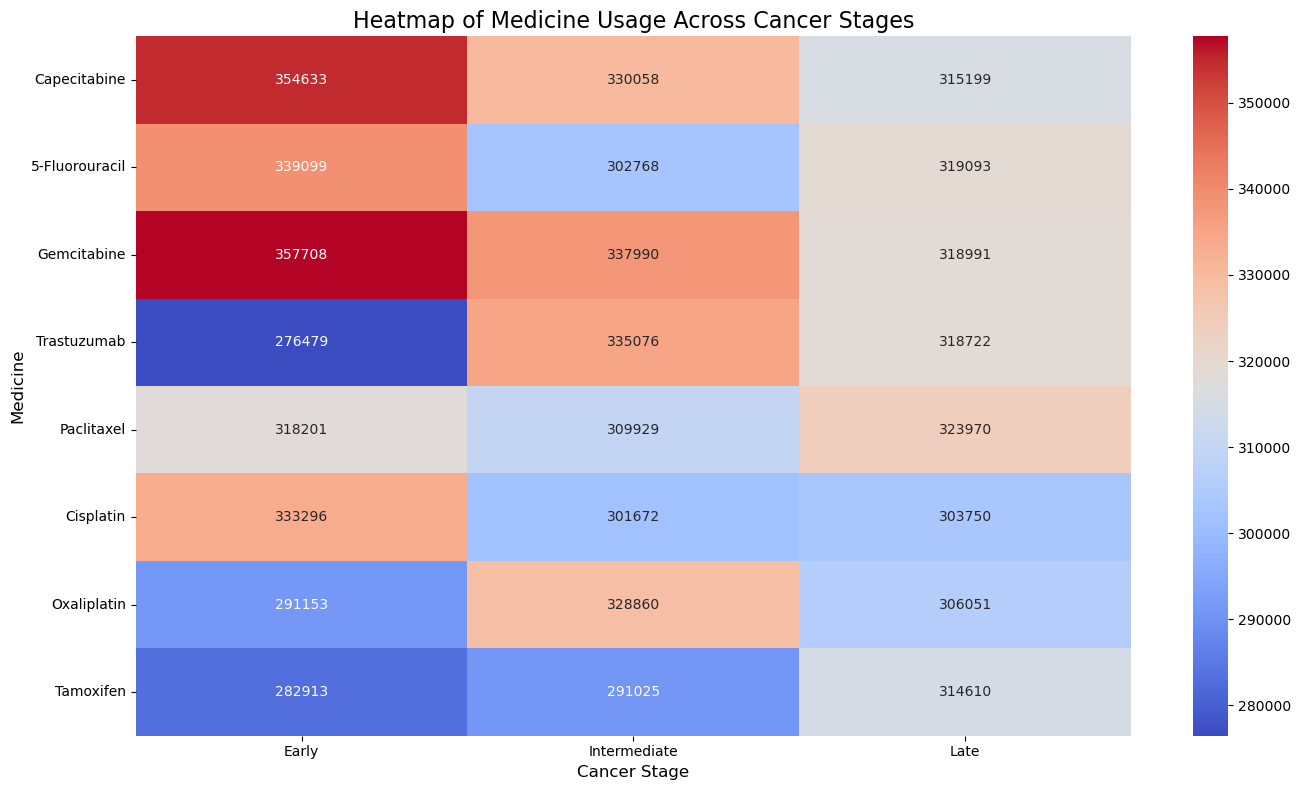

In [9]:
plt.figure(figsize=(14, 8))
sns.heatmap(top_medicine_analysis, annot=True, fmt='.0f', cmap='coolwarm', cbar=True)
plt.title('Heatmap of Medicine Usage Across Cancer Stages', fontsize=16)
plt.xlabel('Cancer Stage', fontsize=12)
plt.ylabel('Medicine', fontsize=12)
plt.tight_layout()
plt.show()

# Availability of Medicines

In [12]:
generic_medicines = ['generic_medicine_1', 'generic_medicine_2']  # Replace with actual names
cancer_data['Medicine Type'] = cancer_data['Top Medicines'].apply(
    lambda x: 'Generic' if x.lower() in generic_medicines else 'Standard'
)

Availability of Top Medicines (Generic vs Standard):
Medicine Type   Standard
Top Medicines           
5-Fluorouracil    960960
Capecitabine      999890
Cisplatin         938718
Gemcitabine      1014689
Oxaliplatin       926064
Paclitaxel        952100
Tamoxifen         888548
Trastuzumab       930277


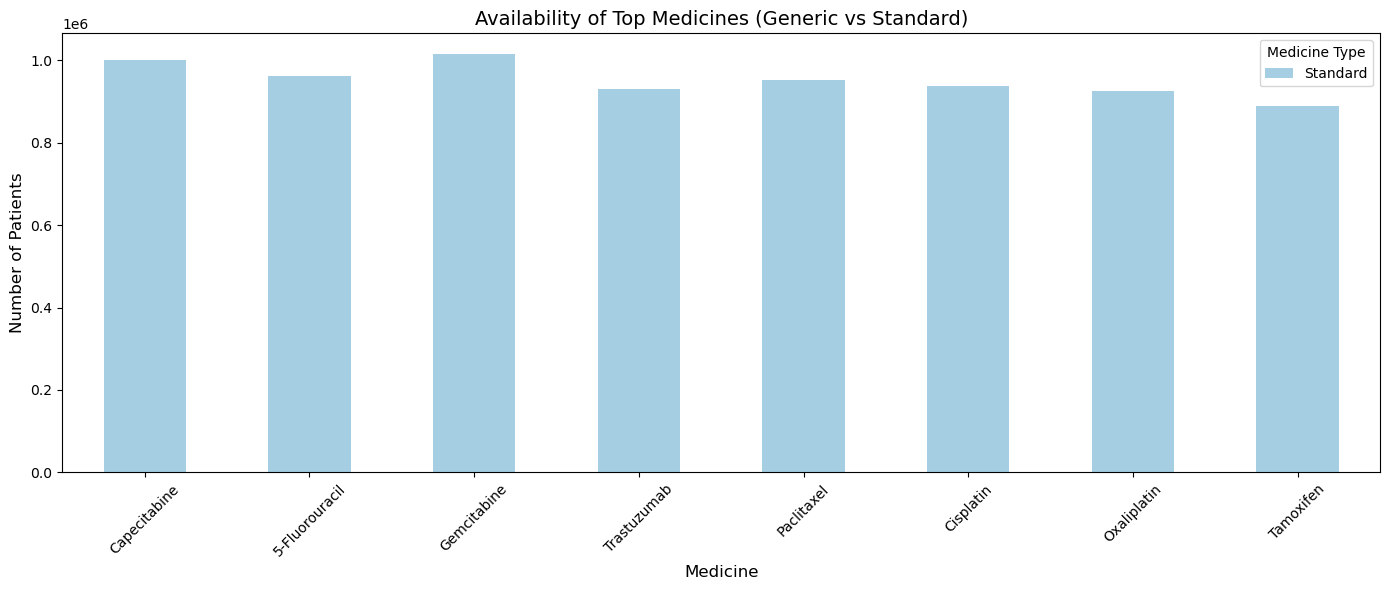

In [14]:
availability = cancer_data.groupby(['Top Medicines', 'Medicine Type'])['Patients'].sum().unstack()
print("Availability of Top Medicines (Generic vs Standard):")
print(availability)
top_medicines = cancer_data['Top Medicines'].value_counts().head(20).index
top_medicine_availability = availability.loc[top_medicines]

# Plot stacked bar chart
top_medicine_availability.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Paired')
plt.title('Availability of Top Medicines (Generic vs Standard)', fontsize=14)
plt.xlabel('Medicine', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# Leading Cancer Specialty Hospitals Analysis

Count of Patients Served by Specialty Hospitals

In [16]:
# Count the number of patients served by each specialty hospital
hospital_patient_count = cancer_data.groupby('Specialty Hospitals')['Patients'].sum().sort_values(ascending=False)

# Display the hospitals with the highest patient count
print("Leading Specialty Hospitals by Number of Patients Served:")
print(hospital_patient_count.head(10))


Leading Specialty Hospitals by Number of Patients Served:
Specialty Hospitals
Apollo Cancer Institute, Chennai              1173911
Netaji Subhas Chandra Bose Cancer Hospital    1159755
Rajiv Gandhi Cancer Institute, Delhi          1100485
PGIMER, Chandigarh                            1094524
Tata Memorial Hospital, Mumbai                1039990
AIIMS, Delhi                                  1029537
HCG Cancer Center, Bangalore                  1013044
Name: Patients, dtype: int64


 Specialty Hospitals by Region

In [17]:
# Count of hospitals in each region
hospital_region_count = cancer_data.groupby('Region Concentration')['Specialty Hospitals'].nunique().sort_values(ascending=False)

# Display regional distribution of specialty hospitals
print("Number of Specialty Hospitals by Region Concentration:")
print(hospital_region_count)


Number of Specialty Hospitals by Region Concentration:
Region Concentration
High      7
Low       7
Medium    7
Name: Specialty Hospitals, dtype: int64


Top Hospitals in Key Regions

In [18]:
top_regions = cancer_data.groupby('Region Concentration')['Patients'].sum().sort_values(ascending=False).head(5).index

# Filter data for top regions
top_region_hospitals = cancer_data[cancer_data['Region Concentration'].isin(top_regions)]

# Count the number of hospitals in top regions
top_region_hospital_count = top_region_hospitals.groupby('Region Concentration')['Specialty Hospitals'].nunique()

print("Top Hospitals in High Patient Regions:")
print(top_region_hospital_count)

Top Hospitals in High Patient Regions:
Region Concentration
High      7
Low       7
Medium    7
Name: Specialty Hospitals, dtype: int64


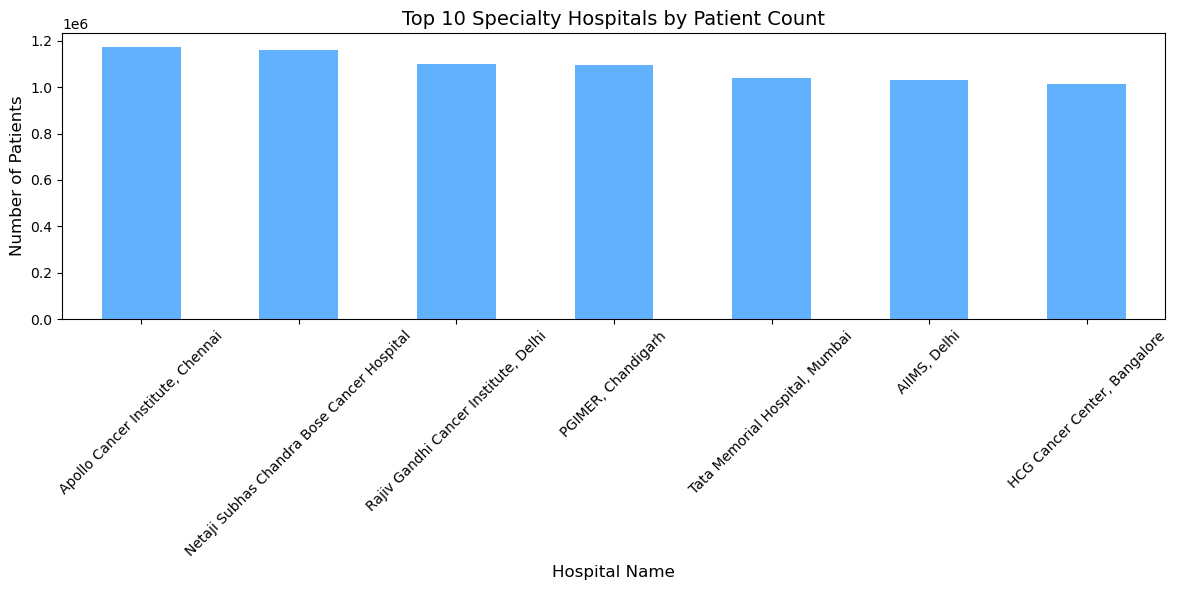

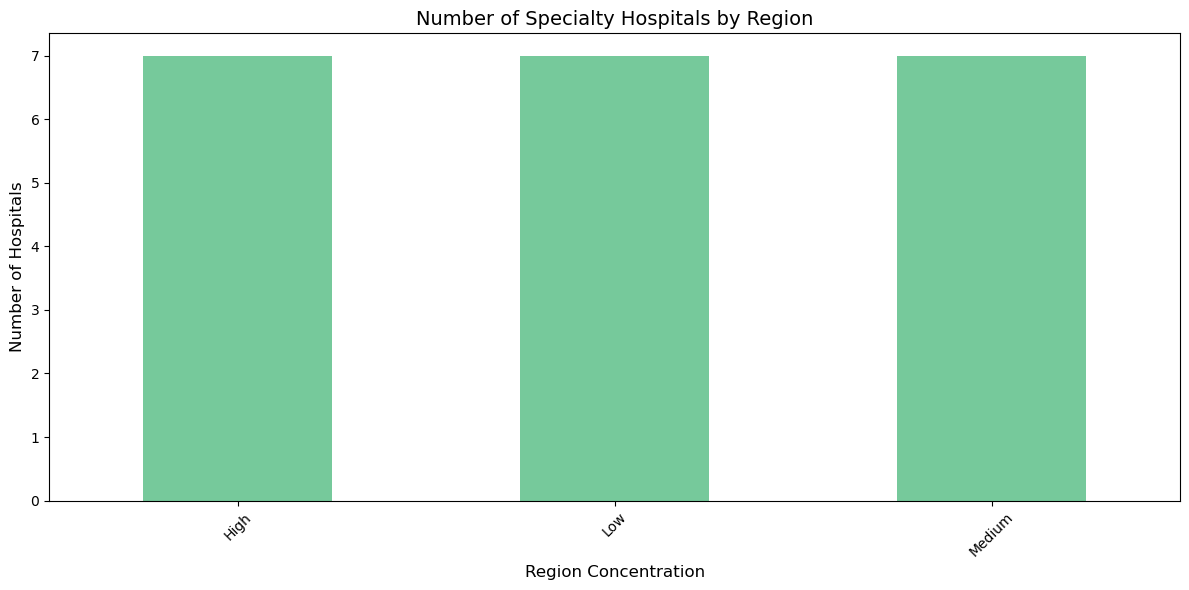

In [19]:
# Plot the leading hospitals by patient count
plt.figure(figsize=(12, 6))
hospital_patient_count.head(10).plot(kind='bar', color='dodgerblue', alpha=0.7)
plt.title('Top 10 Specialty Hospitals by Patient Count', fontsize=14)
plt.xlabel('Hospital Name', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# Plot the number of hospitals in each region
plt.figure(figsize=(12, 6))
hospital_region_count.plot(kind='bar', color='mediumseagreen', alpha=0.7)
plt.title('Number of Specialty Hospitals by Region', fontsize=14)
plt.xlabel('Region Concentration', fontsize=12)
plt.ylabel('Number of Hospitals', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()
